## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


In [74]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [75]:
# load the data
data = 'house-prices.csv'
df = pd.read_csv(data)

In [76]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [77]:
# get dummies for categorical data
df = pd.get_dummies(df)

In [78]:
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,1,0,1,0,0
1,2,114200,2030,4,2,3,1,0,1,0,0
2,3,114800,1740,3,2,1,1,0,1,0,0
3,4,94700,1980,3,2,3,1,0,1,0,0
4,5,119800,2130,3,3,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,0,1,1,0,0
124,125,147900,2160,4,3,3,0,1,1,0,0
125,126,113500,2070,2,2,2,1,0,0,1,0
126,127,149900,2020,3,3,1,1,0,0,0,1


In [79]:
df=df.set_index('Home')

In [80]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
Home,,,,,,,,,,
1,114300,1790,2,2,2,1,0,1,0,0
2,114200,2030,4,2,3,1,0,1,0,0
3,114800,1740,3,2,1,1,0,1,0,0
4,94700,1980,3,2,3,1,0,1,0,0
5,119800,2130,3,3,3,1,0,1,0,0


In [81]:
# create a price category for price using 25th, 50th, and 75th percentiles as cheap, average, and expensive
df['Price Category'] = pd.qcut(df['Price'], q=[0, .25, .75, 1], labels=['Cheap', 'Average', 'Expensive'])

In [82]:
#create a scale factor price category cheap = 1, average = 2, expensive = 3
df['Price Category Scale'] = pd.qcut(df['Price'], q=[0, .25, .75, 1], labels=[1, 2, 3])

In [83]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West,Price Category,Price Category Scale
Home,,,,,,,,,,,,
1,114300,1790,2,2,2,1,0,1,0,0,Average,2
2,114200,2030,4,2,3,1,0,1,0,0,Average,2
3,114800,1740,3,2,1,1,0,1,0,0,Average,2
4,94700,1980,3,2,3,1,0,1,0,0,Cheap,1
5,119800,2130,3,3,3,1,0,1,0,0,Average,2


In [84]:
# correlation heatmap plot 
def plot_correlation_heatmap(df):
    sns.set(style="whitegrid")
    sns.heatmap(df.corr(), annot=True, fmt=".2f")
    plt.show()


/var/folders/7f/4z7lvktj44g121hm_1s6v18h0000gn/T/ipykernel_57726/1587134451.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


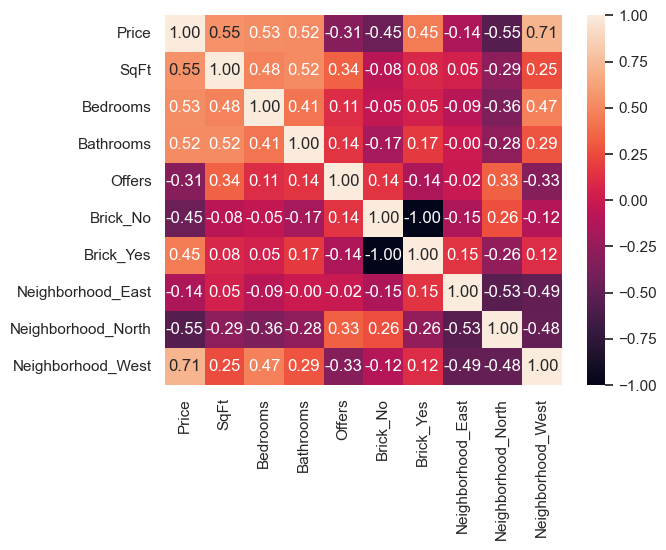

In [85]:
plot_correlation_heatmap(df)

In [86]:
# select columns price to neighborhood_west
#df = df.loc[:, 'Price':'Neighborhood_West']

In [88]:
# define data frame for pca (training data)
df_pca = df.drop(['Price Category','Price Category Scale'],axis=1)

In [90]:
#scale columns using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df_pca
X = sc.fit_transform(X)
y = df['Price Category Scale']

In [91]:
dfx = pd.DataFrame(data=X,columns=df.columns[:-2])
dfx.head(10)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,-0.602585,-1.000916,-1.415327,-0.868939,-0.542769,0.698836,-0.698836,1.358103,-0.723747,-0.661968
1,-0.606321,0.137904,1.350503,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
2,-0.583903,-1.238171,-0.032412,-0.868939,-1.481614,0.698836,-0.698836,1.358103,-0.723747,-0.661968
3,-1.334923,-0.099350,-0.032412,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
4,-0.397082,0.612413,-0.032412,1.082362,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
5,-0.591376,-1.048367,-0.032412,-0.868939,-0.542769,0.698836,-0.698836,-0.736321,1.381699,-0.661968
6,0.791099,-0.811113,-0.032412,1.082362,0.396075,-1.430950,1.430950,-0.736321,-0.723747,1.510646
7,0.757471,0.754765,1.350503,-0.868939,-0.542769,0.698836,-0.698836,-0.736321,-0.723747,1.510646
8,-0.419500,0.517511,1.350503,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
9,-0.987436,-1.285622,-0.032412,1.082362,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968


In [93]:
#TODO:
#1. Extract the two best principal components (n_components=2). 
#2. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?
#3. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 
#4. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.

In [94]:
#1. Extract the two best principal components (n_components=2).
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfx_pca = pca.fit(X)


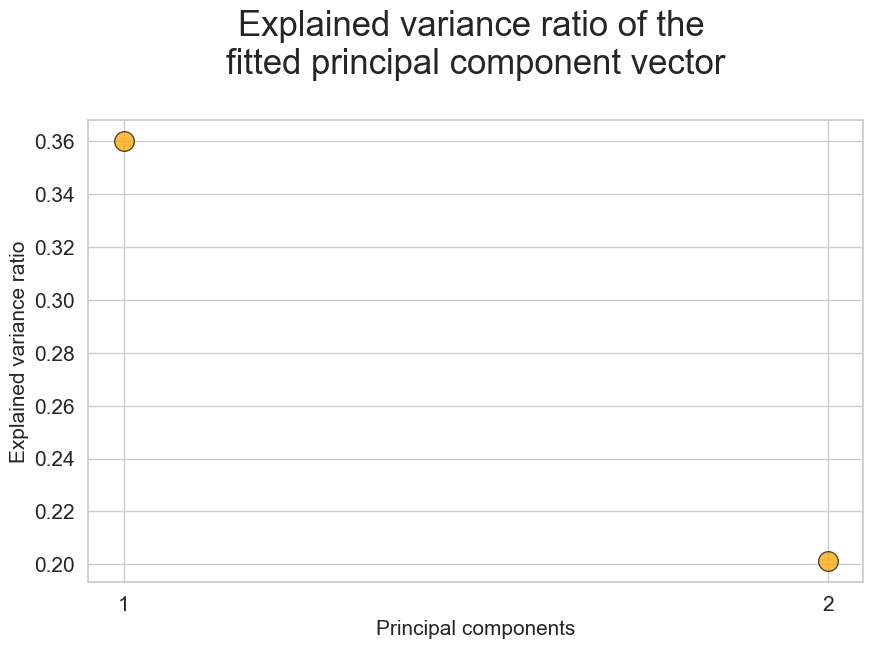

In [95]:
#2. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


/Users/patrickokwir/anaconda3/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


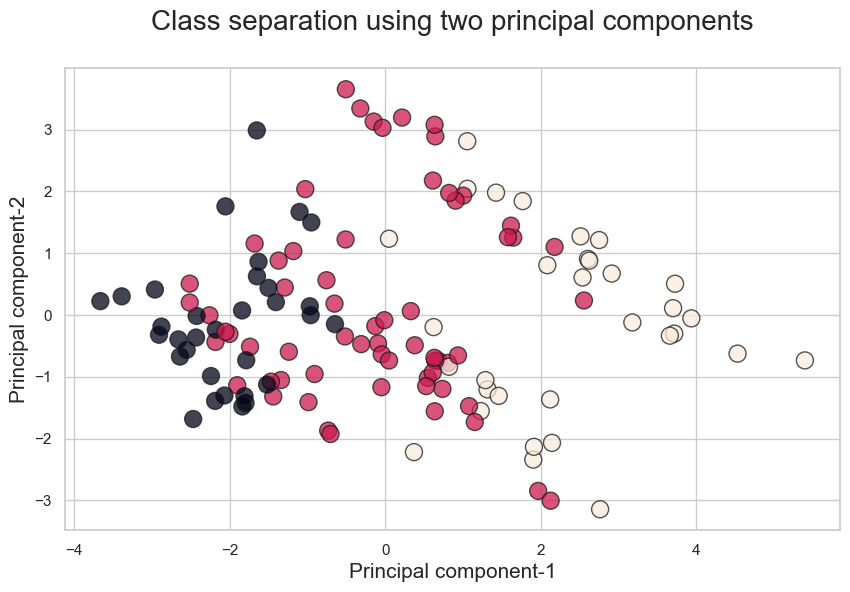

In [96]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
y = df['Price Category Scale']

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=y,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [ ]:
#3. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2.


In [102]:
#convert np array to dataframe
dfx.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,-0.602585,-1.000916,-1.415327,-0.868939,-0.542769,0.698836,-0.698836,1.358103,-0.723747,-0.661968
1,-0.606321,0.137904,1.350503,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
2,-0.583903,-1.238171,-0.032412,-0.868939,-1.481614,0.698836,-0.698836,1.358103,-0.723747,-0.661968
3,-1.334923,-0.099350,-0.032412,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
4,-0.397082,0.612413,-0.032412,1.082362,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968


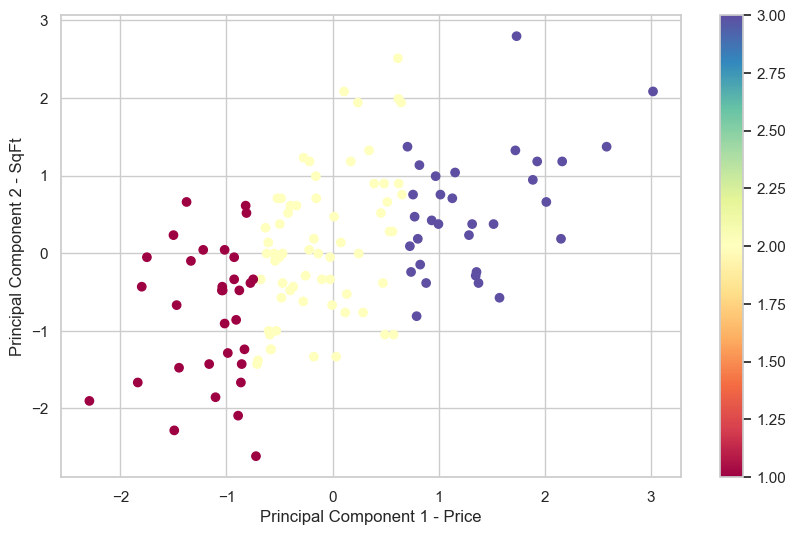

In [98]:
# create a loding plot with the two principal components
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.xlabel('Principal Component 1 - Price')
plt.ylabel('Principal Component 2 - SqFt')
plt.colorbar()
plt.show()

In [107]:
#4. **Stretch** The combination of the previous two plots is called a PCA biplot.

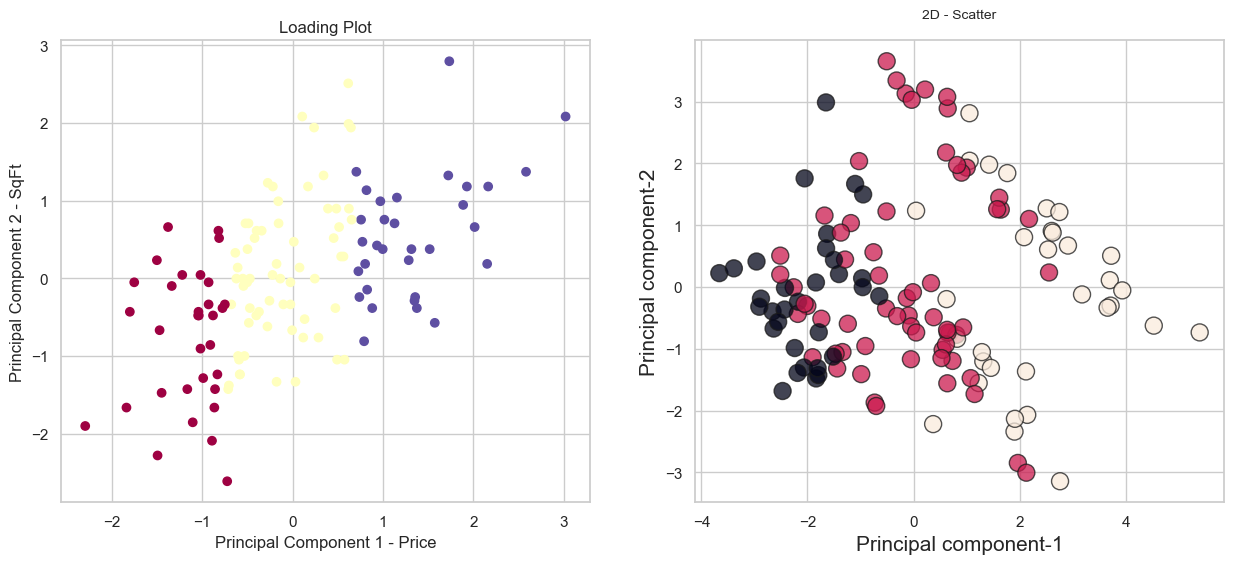

In [113]:
# create a pca biplot of loading plot and 2d pca scatter plot
plt.figure(figsize=(15,6))
# Plot 1 - loading plot
plt.subplot(1,2,1)
plt.title('Loading Plot')
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.xlabel('Principal Component 1 - Price')
plt.ylabel('Principal Component 2 - SqFt')
#plt.colorbar()
# Plot 2 - 2D PCA Scatter Plot
plt.subplot(1,2,2)
plt.scatter(dfx_trans[0],dfx_trans[1],c=y,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("2D - Scatter\n",fontsize=10)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
# Show plots
plt.show()

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

In [114]:
# TODO:
# 1. Create a scree plot and determine the number of principal components in the data.
# 2. Create a cumulative explained variance plot and determine the number of principal components in the data.
# 3. Refit PCA with chosen number of components and project principal components to a dataframe
# 4. Export the projected data to a csv file

In [116]:
#1. Create a scree plot and determine the number of principal components in the data.
pca = PCA(n_components=None)
dfx_pca = pca.fit(X)



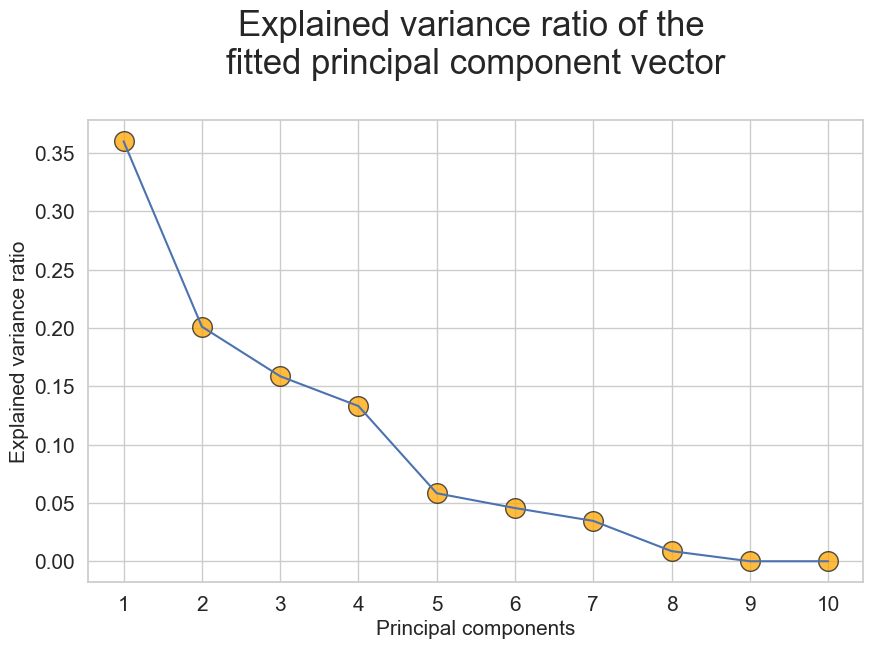

In [120]:
plt.figure(figsize=(10,6))
plt.plot([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],dfx_pca.explained_variance_ratio_)
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [155]:
# 3. Refit PCA with 5 and project principal components to a dataframe
pca = PCA(n_components=5)
dfx_pca = pca.fit(X)

In [156]:
# project principal components to a dataframe
len(pca.explained_variance_ratio_)

# sum of explained variance ratio for first 5  principal components
pca.explained_variance_ratio_[0:5].sum()


0.9111389323247479

In [154]:
df_pca.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
Home,,,,,,,,,,
1,114300,1790,2,2,2,1,0,1,0,0
2,114200,2030,4,2,3,1,0,1,0,0
3,114800,1740,3,2,1,1,0,1,0,0
4,94700,1980,3,2,3,1,0,1,0,0
5,119800,2130,3,3,3,1,0,1,0,0


In [158]:
# project principal 5 components to a dataframe 
principal_components = pca.components_
principal_components_df = pd.DataFrame(data=principal_components, columns=df_pca.columns)

In [159]:
principal_components_df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,0.489973,0.309951,0.330669,0.324734,-0.111445,-0.294258,0.294258,0.006074,-0.360319,0.365514
1,-0.046623,-0.303084,-0.326035,-0.210425,-0.274622,-0.494416,0.494416,0.350822,-0.138626,-0.220870
2,-0.138385,0.381665,0.089156,0.258666,0.546679,-0.060875,0.060875,0.497120,-0.063182,-0.450482
3,0.028884,0.055329,-0.061114,0.094461,0.354011,-0.369926,0.369926,-0.518257,0.560516,-0.040793
4,0.110968,0.039665,-0.571453,0.722947,-0.296885,0.105481,-0.105481,-0.008090,0.117284,-0.112634


_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.

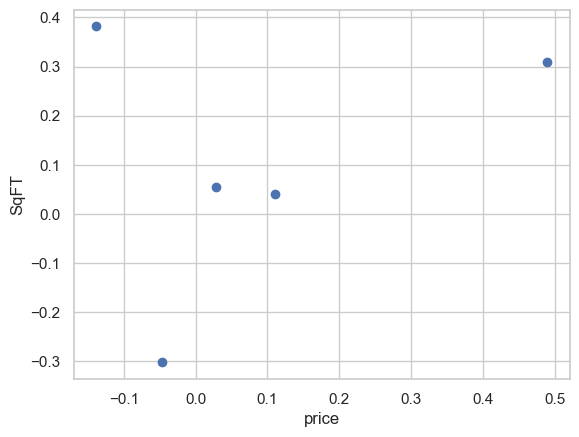

In [136]:
#create a varriable correlation plot between principal_components_df price and principal_components_df SqFT
plt.scatter(principal_components_df['Price'], principal_components_df['SqFT'])
plt.xlabel('price')
plt.ylabel('SqFT')
plt.show()



In [160]:
# plot seaborn heatmap of principal_components_df
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_principal_components_df(principal_components_df):
    sns.heatmap(principal_components_df, annot=True, fmt=".2f")
    plt.show()

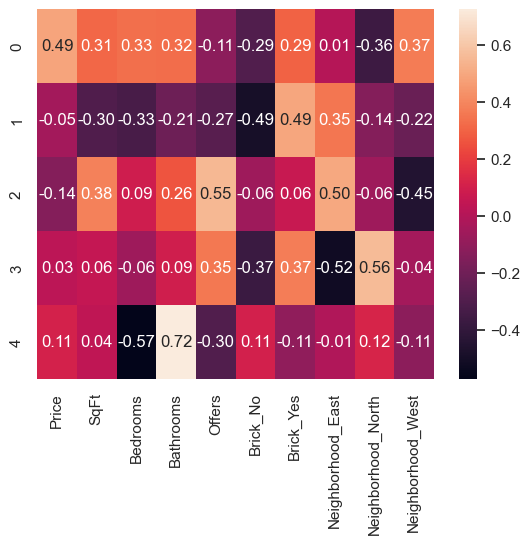

In [161]:
# call plot_principal_components_df function
plot_principal_components_df(principal_components_df)